In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
import matplotlib.pyplot as plt

# Loading datasets.

In [114]:
telco = pd.read_csv('https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv', sep = ',',na_values=' ')#()=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn'])
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [129]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [128]:
mall = pd.read_csv('https://tufts.box.com/shared/static/w2xf5yv5wczx7rfmdmbjpfd1u604hhvo.csv', error_bad_lines=False, sep = ',',na_values=' ')
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Cleaning Data

In [12]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Replacing column values 'Male to 1' , 'Female to 2' and 'Yes to 1' and 'No to 2'

In [71]:
telco.gender.loc[telco.gender == 'Male'] = 1
telco.gender.loc[telco.gender == 'Female'] = 2

telco.Partner.loc[telco.Partner == 'Yes'] = 1
telco.Partner.loc[telco.Partner == 'No'] = 2

telco.Dependents.loc[telco.Dependents == 'Yes'] = 1
telco.Dependents.loc[telco.Dependents == 'No'] = 2

telco.PhoneService.loc[telco.PhoneService == 'Yes'] = 1
telco.PhoneService.loc[telco.PhoneService == 'No'] = 2

telco.PaperlessBilling.loc[telco.PaperlessBilling == 'Yes'] = 1
telco.PaperlessBilling.loc[telco.PaperlessBilling == 'No'] = 2

telco.head()

/miniconda3/envs/em212/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,2,0,1,2,1,2,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,2,2,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,2,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,2,2,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,2,2,45,2,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,2,NaN,42.30,1840.75,No
4,9237-HQITU,2,0,2,2,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes


In [110]:
telco.MultipleLines.loc[telco.MultipleLines == 'No phone service'] = 'No'
telco.OnlineSecurity.loc[telco.OnlineSecurity == 'No internet service'] = 'No'
telco.OnlineBackup.loc[telco.OnlineBackup == 'No internet service'] = 'No'
telco.DeviceProtection.loc[telco.DeviceProtection == 'No internet service'] = 'No'
telco.TechSupport.loc[telco.TechSupport == 'No internet service'] = 'No'
telco.StreamingTV.loc[telco.StreamingTV == 'No internet service'] = 'No'
telco.StreamingMovies.loc[telco.StreamingMovies == 'No internet service'] = 'No'

telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,2,0,1,2,1,2,No,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,2,2,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,2,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,2,2,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,2,2,45,2,No,DSL,Yes,...,Yes,Yes,No,No,One year,2,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,0,2,2,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes


Changed PaymentMethod into dummy variables and dropped one of value since we only need  n−1 out of the 4 categories to represent the data.

In [113]:
telco = pd.concat([telco, pd.get_dummies(telco.PaymentMethod, drop_first=True)], axis=1)
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,2,0,1,2,1,2,No,DSL,No,...,No,Month-to-month,1,Electronic check,29.85,29.85,No,0,1,0
1,5575-GNVDE,1,0,2,2,34,1,No,DSL,Yes,...,No,One year,2,Mailed check,56.95,1889.50,No,0,0,1
2,3668-QPYBK,1,0,2,2,2,1,No,DSL,Yes,...,No,Month-to-month,1,Mailed check,53.85,108.15,Yes,0,0,1
3,7795-CFOCW,1,0,2,2,45,2,No,DSL,Yes,...,No,One year,2,Bank transfer (automatic),42.30,1840.75,No,0,0,0
4,9237-HQITU,2,0,2,2,2,1,No,Fiber optic,No,...,No,Month-to-month,1,Electronic check,70.70,151.65,Yes,0,1,0


The TotalCharges column contains null values. The entires with missing values will be omited in the analysis

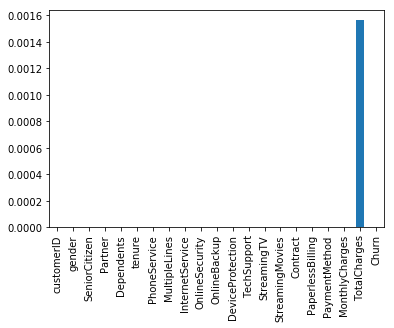

In [112]:
(telco_data.isnull().sum()/len(telco_data)).plot(kind='bar')

# Analyzing Datasets

### Majority of the clients spend less than $40 per month on telecommunication services.

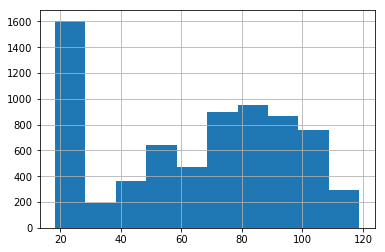

In [152]:
telco.MonthlyCharges.hist()

In [34]:
PaymentMethod_ranking = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
print(PaymentMethod_ranking)
Contract_ranking = ['Month-to-month' ,'One year', 'Two year']
print(Contract_ranking)

['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
['Month-to-month', 'One year', 'Two year']


In [35]:
columns_n_orders = {'PaymentMethod': PaymentMethod_ranking, 'Contract': Contract_ranking}

for column, ordering in columns_n_orders.items():
    telco.loc[:,column] = telco.loc[:,column]\
    .astype('category', ordered=True, categories=ordering)

/miniconda3/envs/em212/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


### A big number of customers prefer month-to month mode of payment 

Text(0, 0.5, '')

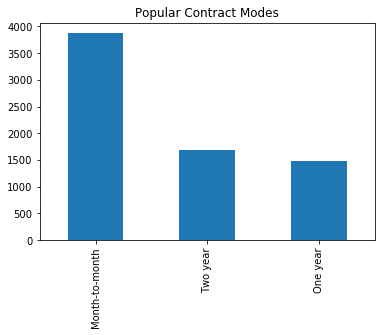

In [38]:
telco['Contract'].value_counts().plot(kind='bar')
plt.title('Popular Contract Modes')
plt.ylabel('')

In [144]:
telco.groupby(['PaymentMethod','Contract'])['TotalCharges'].sum(level=[0,1])

PaymentMethod              Contract      
Bank transfer (automatic)  Month-to-month    1111708.30
                           One year          1295385.60
                           Two year          2341186.00
Credit card (automatic)    Month-to-month     980596.20
                           One year          1336188.15
                           Two year          2354809.00
Electronic check           Month-to-month    2721957.80
                           One year          1337085.70
                           Two year           885859.75
Mailed check               Month-to-month     491599.20
                           One year           498394.05
                           Two year           701398.95
Name: TotalCharges, dtype: float64

## Gender balance is averagely equally spread out among our customers with males spending slightly more than females on all telco services.

In [146]:
telco.groupby(['gender'])['TotalCharges'].sum().reset_index()

,gender,TotalCharges
0,Female,7952354.2
1,Male,8103814.5


## Among the payment methods available, the use of electronic check is the most popular. However, ther is also a significant and steady number of clients using the other payment channels available.

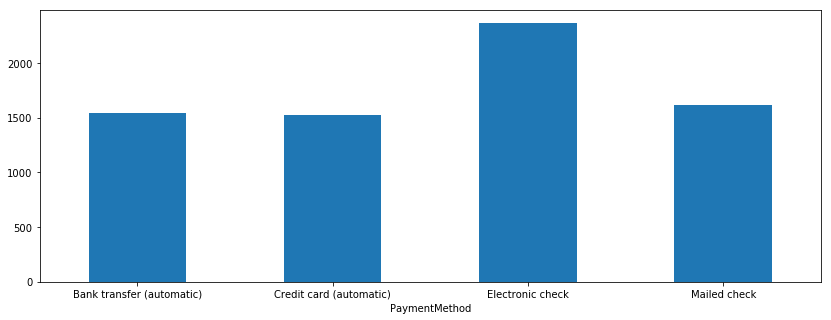

In [127]:
telco.groupby("PaymentMethod")["Churn"].count().plot.bar(rot=0, figsize=(14, 5))

### Majority of customers churn within the first couple of months (0-10 months) of subscribing to the service. This is valuable data to the telco provider because they can allocate more resources towards incentivizing clients to stay longer than just a few months. Thereafter, their tenure rate is fairly stable. There is also a high number of customers that remain loyal to their telco provider (70 months). 

Text(0.5, 0, 'tenure')

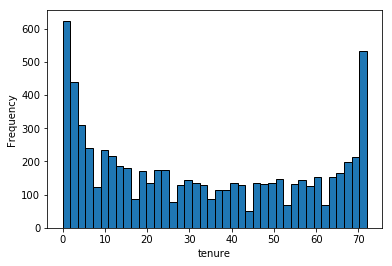

In [138]:
telco["tenure"].plot.hist(bins=40, edgecolor="k")
plt.xlabel('tenure')

# Merging Datasets

In [150]:
mall.join([telco], how='inner', on=None)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),customerID,gender,SeniorCitizen,Partner,Dependents,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,Male,19,15,39,7590-VHVEG,Female,0,Yes,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,2,Male,21,15,81,5575-GNVDE,Male,0,No,No,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3,Female,20,16,6,3668-QPYBK,Male,0,No,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,4,Female,23,16,77,7795-CFOCW,Male,0,No,No,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,5,Female,31,17,40,9237-HQITU,Female,0,No,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,6,Female,22,17,76,9305-CDSKC,Female,0,No,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,7,Female,35,18,6,1452-KIOVK,Male,0,No,Yes,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,8,Female,23,18,94,6713-OKOMC,Female,0,No,No,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,9,Male,64,19,3,7892-POOKP,Female,0,Yes,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,10,Female,30,19,72,6388-TABGU,Male,0,No,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
